<a href="https://colab.research.google.com/github/hamagami/is2021/blob/main/Fisher_Discriminant_Analysiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisher Discriminant Analysis
Distribution-based classification analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
DIM = 2 #dimension of data

## Liner model

In [2]:
def f(x, a, b):
    return a*x+b

## Plot format

In [3]:
def plot(cls1, cls2, line=None):
    x,y = cls1.T
    plt.plot(x, y, 'bo', ms=3, label='class1')
    x, y = cls2.T
    plt.plot(x, y, 'ro', ms=3, label='class2')

    if not (line is None):
        plt.plot(line[0], line[1], 'k-', ms=5)

    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.show()

## Fisher analysis

In [4]:
def fisher(cls1, cls2):
    cls1 = np.array(cls1)
    cls2 = np.array(cls2)

    #means in each class
    mean1 = np.mean(cls1, axis=0)
    mean2 = np.mean(cls2, axis=0)

    #covariance matrix in class
    sw = np.zeros((DIM,DIM))
    for xn in cls1:
        xn = xn.reshape(DIM,1)
        mean1 = mean1.reshape(DIM,1)
        sw += np.dot((xn-mean1),(xn-mean1).T)
    for xn in cls2:
        xn = xn.reshape(DIM,1)
        mean2 = mean2.reshape(DIM,1)
        sw += np.dot((xn-mean2),(xn-mean2).T)

    #inv. matrix
    sw_inv = np.linalg.inv(sw)

    w = np.dot(sw_inv,(mean1-mean2))

    return w,(mean1,mean2)

## main 

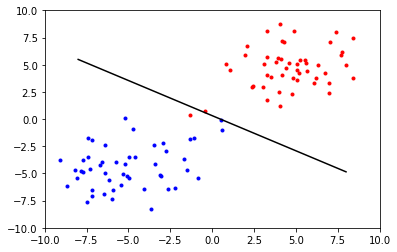

w = [[-0.01213026]
 [-0.01877282]] 



In [6]:
# generate data
cov = [[5,1],[1,5]] #Covariance
cls1 = np.random.multivariate_normal([-5,-5], cov, 50)
cls2 = np.random.multivariate_normal([5,5], cov, 50)

# Fisher analysis
w, means= fisher(cls1, cls2)

#Plot
mean = (means[0] + means[1])/2
a = -w[0]/w[1] 
b = a*mean[0]+mean[1]
x = np.linspace(-8, 8, 1000)
y = f(x,a,b)

plot(cls1, cls2, (x,y))
    
print('w =', w, '\n')